<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/Junpito_kuis_kp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/tugas/pistachio-image-dataset-master.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
len(os.listdir('/tmp/pistachio-image-dataset/Pistachio_Image_Dataset'))

3

In [ ]:
import pathlib
data_dir = pathlib.Path('/tmp/pistachio-image-dataset/Pistachio_Image_Dataset')


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


2148


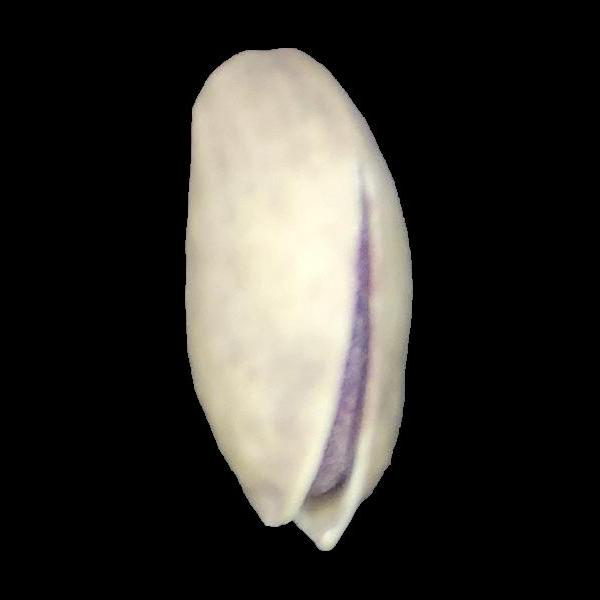

In [ ]:
pstc = list(data_dir.glob('*/*.jpg'))
PIL.Image.open(str(pstc[0]))


In [ ]:
for i in range(image_count-9,image_count):
  print(PIL.Image.open(str(pstc[0])))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17703880>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17703880>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17703880>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17432820>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17445A00>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17445A90>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17445B80>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17445C40>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x7F4F17445CA0>


In [ ]:
batch_size = 32
img_height = 180
img_width = 180


##.
Lakukan data splitting dataset tersebut sehingga dataset terbagi menjadi data training dan data validation dengan rasio 80:20!


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2148 files belonging to 2 classes.
Using 1719 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 2148 files belonging to 2 classes.
Using 429 files for validation.


##,
Lakukan input data image tersebut dan outputkan 9 gambar terakhir dalam dataset beserta dengan label kelas nya!

In [ ]:
class_names = train_ds.class_names
print(class_names)


['Kirmizi_Pistachio', 'Siirt_Pistachio']


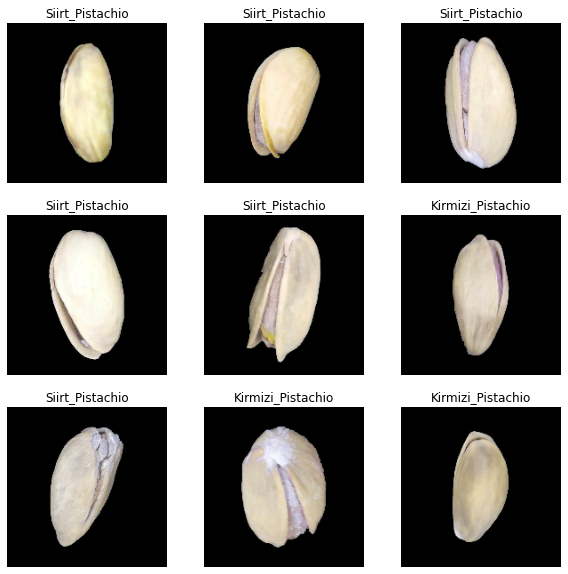

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    #menampilkan gambar 9 terakhir
    plt.imshow(images[-i - 1].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


##.
Buatlah sebuah fungsi untuk membuat model DNN tersebut menggunakan library tensorflow dan keras dengan rincian parameter sebagai berikut:
* Loss function: SparseCategoricalCrossentropy
* Hidden Layer activation function : relu
* Batch Size: 32
* Epoch: 5
* Evaluation metrics: Accuracy


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(input_shape=(180, 180, 3), scale=1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 300)               29160300  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 29,195,552
Trainable params: 29,195,552
No

compile model

In [ ]:
from tensorflow.keras import losses
loss = losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',loss=loss,
              metrics=['accuracy'])

##.
Buatlah sebuah fungsi untuk melakukan proses training pada data training dataset tersebut! Visualisasikan perbandingan loss dan accuracy nya terhadap data validation! 

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, batch_size=32, epochs=5)

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 6s 57ms/step - loss: 2.0303 - accuracy: 0.6958 - val_loss: 0.7972 - val_accuracy: 0.7669
Epoch 2/5
54/54 [==============================] - 3s 54ms/step - loss: 0.6077 - accuracy: 0.7853 - val_loss: 0.4333 - val_accuracy: 0.8345
Epoch 3/5
54/54 [==============================] - 3s 54ms/step - loss: 0.7745 - accuracy: 0.7656 - val_loss: 1.5433 - val_accuracy: 0.6503
Epoch 4/5
54/54 [==============================] - 3s 53ms/step - loss: 0.6428 - accuracy: 0.7987 - val_loss: 0.4314 - val_accuracy: 0.8438
Epoch 5/5
54/54 [==============================] - 3s 52ms/step - loss: 0.3922 - accuracy: 0.8307 - val_loss: 0.3577 - val_accuracy: 0.8485


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.352357,0.847586,0.368451,0.843823
1,0.330398,0.858057,0.413987,0.811189
2,0.362900,0.832461,0.364102,0.855478
3,0.299926,0.866201,0.355846,0.841492
4,0.296521,0.881326,0.380923,0.853147


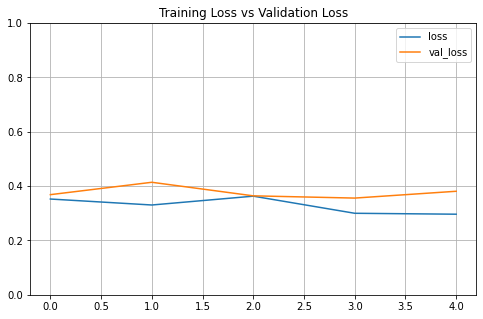

In [ ]:
df[['loss','val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.title('Training Loss vs Validation Loss')
plt.show()

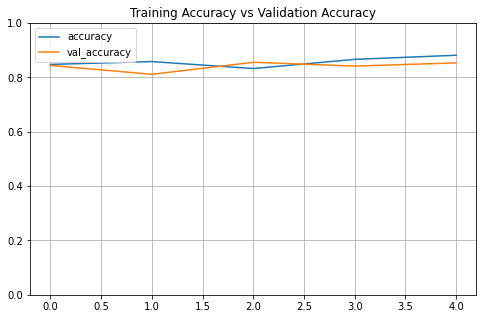

In [ ]:
df[['accuracy','val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()

##.
Buatlah sebuah decorator untuk menambahkan perhitungan waktu runtime dari fungsi training pada nomor 6! 


In [ ]:
import time

def timeit(func):
  def wrapper(*args, **kwargs):
    start = time.perf_counter()
    result = func(*args, **kwargs)
    end = time.perf_counter()
    print(f"Training took {end - start:.2f} seconds")
    return result
  return wrapper

In [ ]:
@timeit
def train_model(model, train_ds, val_ds, batch_size, epochs):
  history = model.fit(train_ds, validation_data=val_ds, batch_size=batch_size, epochs=epochs)
  return history

history = train_model(model, train_ds, val_ds, 32, 5)

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


54/54 [==============================] - 6s 57ms/step - loss: 2.1346 - accuracy: 0.7039 - val_loss: 0.5603 - val_accuracy: 0.7949
Epoch 2/5
54/54 [==============================] - 3s 52ms/step - loss: 0.9282 - accuracy: 0.7481 - val_loss: 0.6140 - val_accuracy: 0.8228
Epoch 3/5
54/54 [==============================] - 3s 52ms/step - loss: 0.5087 - accuracy: 0.8185 - val_loss: 0.3839 - val_accuracy: 0.8531
Epoch 4/5
54/54 [==============================] - 3s 52ms/step - loss: 0.4205 - accuracy: 0.8336 - val_loss: 0.3866 - val_accuracy: 0.8368
Epoch 5/5
54/54 [==============================] - 3s 52ms/step - loss: 0.4257 - accuracy: 0.8296 - val_loss: 0.3413 - val_accuracy: 0.8578
Training took 20.24 seconds


##.
Lakukan 4 kali percobaan masing-masing menggunakan runtime GPU dan CPU. Buatlah Analisis Speedup antara  Tgpu (waktu training menggunakan GPU) dan Tcpu (waktu training menggunakan CPU) ! Visualisasikan perbandingannya menggunakan grafik!

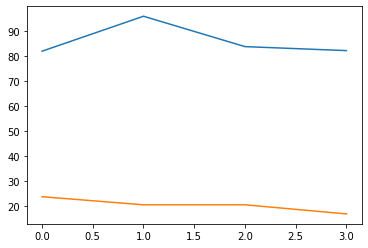

In [ ]:
cpu = [82, 95.97, 83.83, 82.23]
gpu = [23.83, 20.59, 20.60, 16.95]

plt.plot(range(len(cpu)), cpu, label='CPU')
plt.plot(range(len(gpu)), gpu, label='GPU')
plt.show()

In [ ]:
speedup = []

for i in range(len(cpu)):
  speedup.append(cpu[i] / gpu[i])

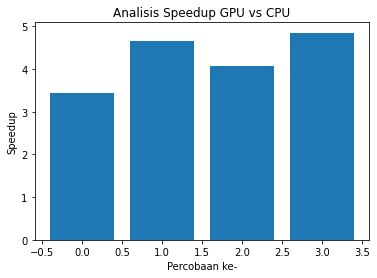

In [ ]:
plt.bar(range(len(speedup)), speedup)
plt.xlabel('Percobaan ke-')
plt.ylabel('Speedup')
plt.title('Analisis Speedup GPU vs CPU')
plt.show()